# **Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression,LogisticRegression
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
    accuracy_score,
    mean_absolute_error
)
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Import Dataset

In [2]:
df = pd.read_csv("tested.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data Preprocessing

### Remove Null values

Remove Null Values of "Age" with mean

In [8]:
age_mean=df['Age'].mean()
df['Age'] = df['Age'].fillna(age_mean)

Remove Null Values of "Fare" with mean

In [9]:
age_mean=df['Fare'].mean()
df['Fare'] = df['Fare'].fillna(age_mean)

### Convert categorical data into numerical data

In [10]:
df["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

As there are 3 values in "Embarked", we'll convert them into 0,1,2 respectively

In [11]:
df['Embarked'] = df['Embarked'].map( 
    {'Q': 0,
    'S':1,
    'C':2}).astype(int)

In [12]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

As there are 3 values in "Sex", we'll convert them into 0,1 respectively

In [13]:
df['Sex'] = df['Sex'].map(
     {'female': 1,
     'male':0}).astype(int)


### Convert all the data types into INT

In [14]:
df['Age'] = df["Age"].astype(int)

In [15]:

df['Fare'] = df["Fare"].astype(int)

## Remove unwanted Features

In [16]:
df.drop(columns=['PassengerId','Name','Cabin','Ticket'], inplace=True)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


# Data Visualization

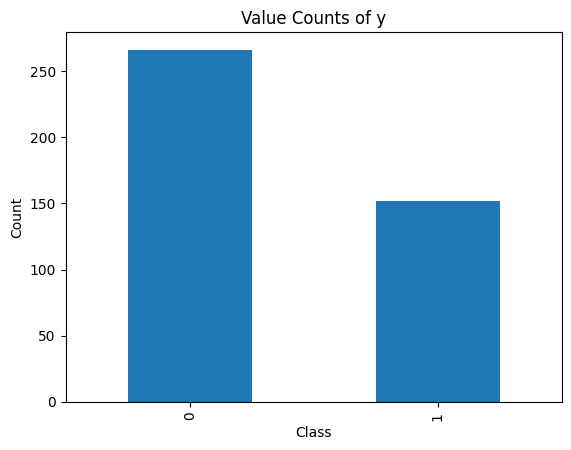

In [18]:
plt.figure()
df["Survived"].value_counts().plot(kind='bar')
plt.title('Value Counts of y')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show();

The number of people who Survived and who did not are imbalance.

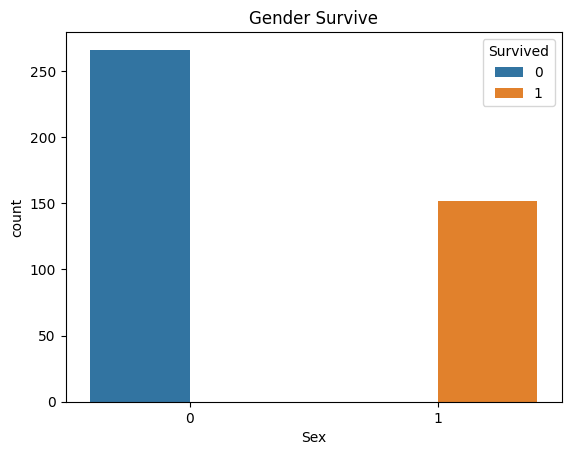

In [19]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Gender Survive')
plt.show()

Gender is highly mapped onto the surviving people

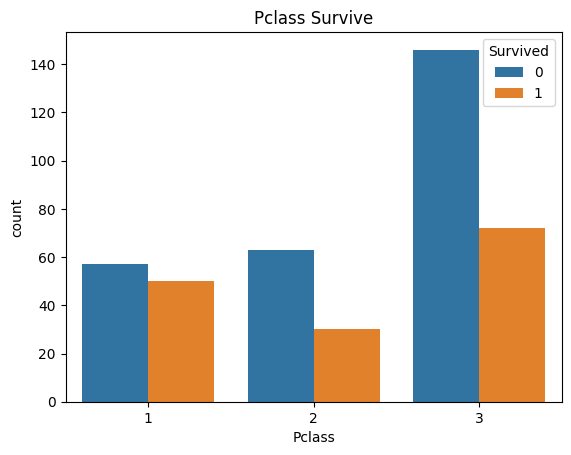

In [20]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Pclass Survive')
plt.show()

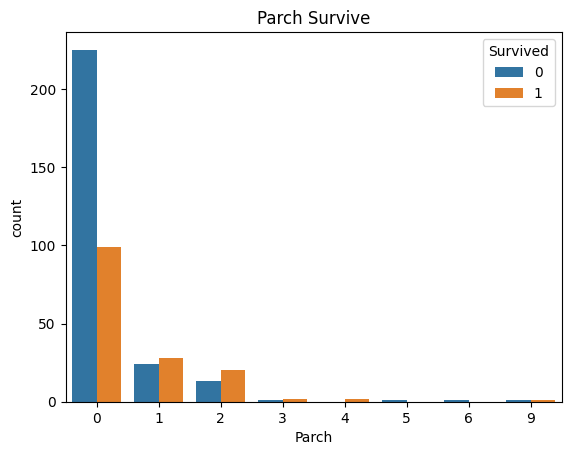

In [21]:
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Parch Survive')
plt.show()

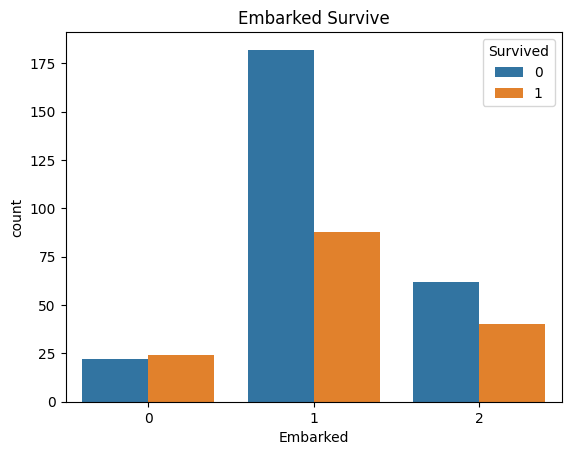

In [22]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Embarked Survive')
plt.show()

### Correlation

Check for the correlation between features

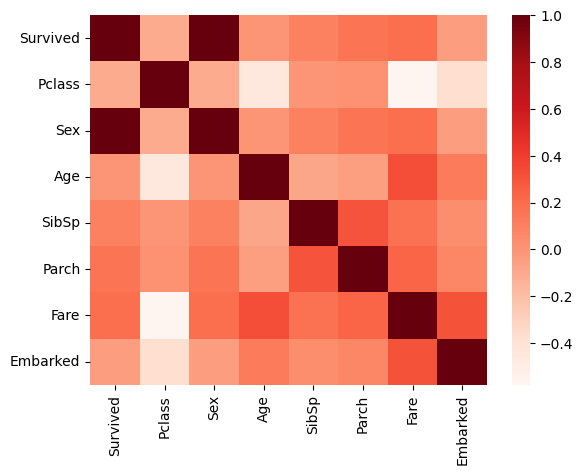

In [23]:
corr= df.corr()
sns.heatmap(corr,cmap='Reds');

This shows that the feature "Sex" has high correlation with surviving.

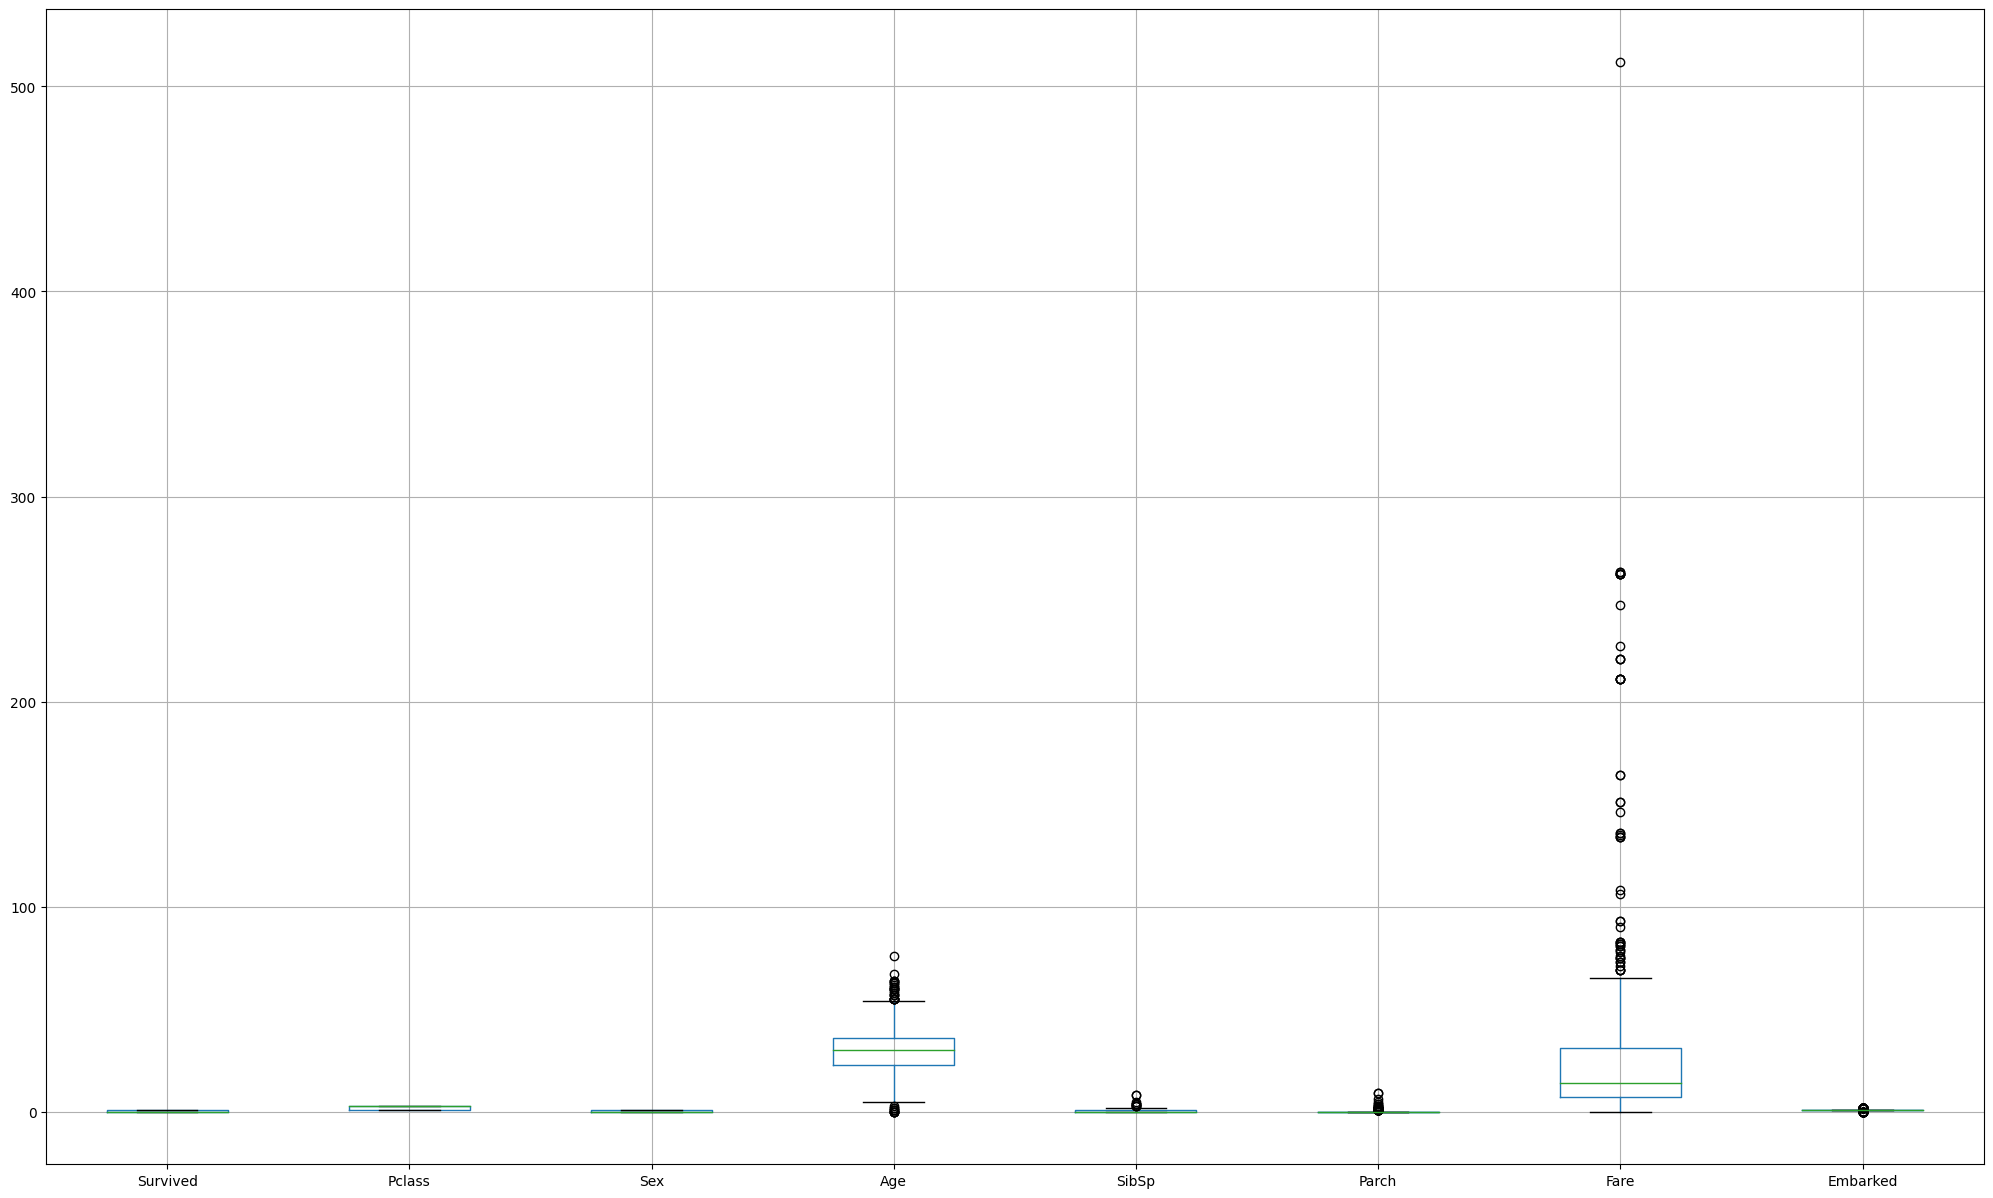

In [24]:
fig, ax = plt.subplots(figsize=(25, 15))
df.boxplot(ax=ax)
plt.show()

Fare has highest number of outliers

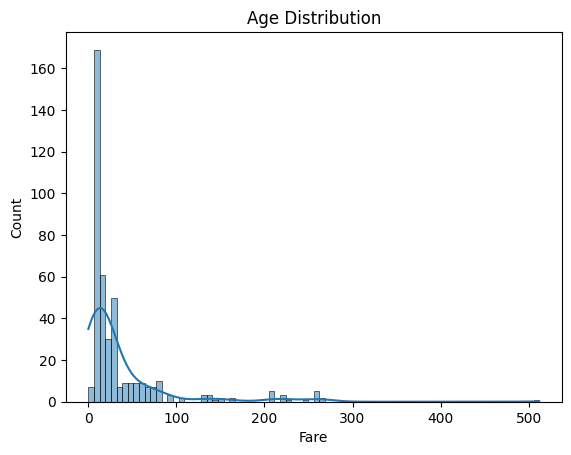

In [25]:
sns.histplot(x='Fare', data=df,kde=True)
plt.title('Age Distribution')
plt.show()

Graph shows that "Fare" is highly skewed. Therefore, we use quantile method

In [26]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3 - q1

lower_range = q1 - 1.5 * iqr
upper_range = q3 + 1.5 * iqr

outlier_indices = df[(df['Fare'] < lower_range) | (df['Fare'] > upper_range)].index

df = df.drop(outlier_indices)

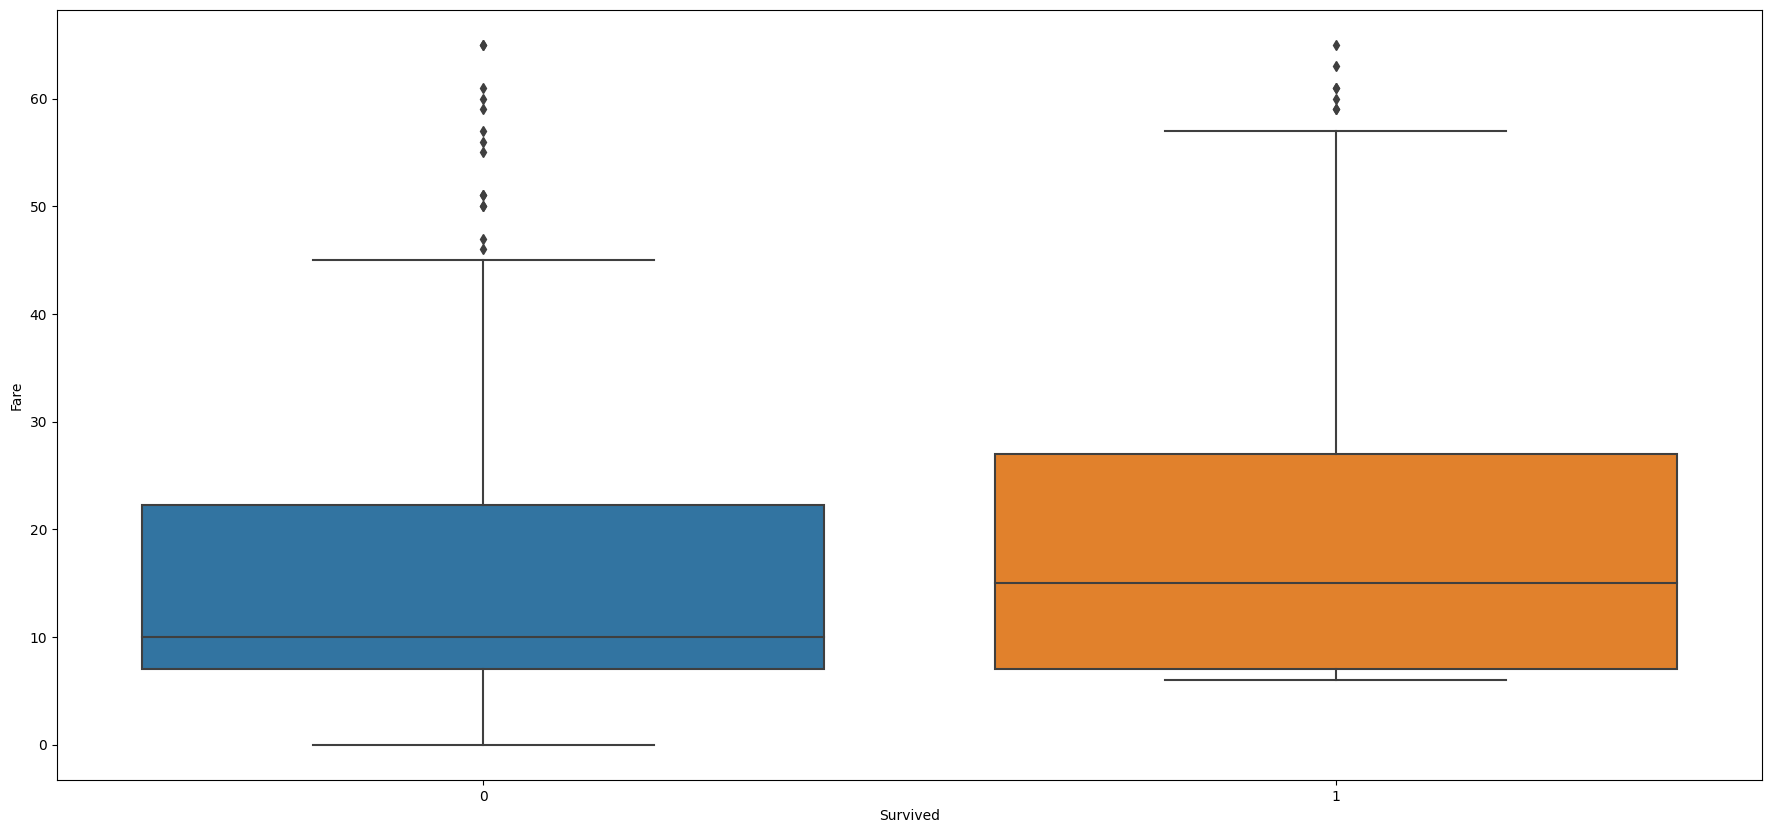

In [27]:
plt.figure(figsize=(22, 10))
sns.boxplot(data=df, x='Survived', y='Fare');

### Split Data

In [28]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,train_size=0.8,random_state = 42)

In [31]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (232, 7)
y_train shape: (232,)
X_val shape: (58, 7)
y_val shape: (58,)
X_test shape: (73, 7)
y_test shape: (73,)


#### Oversampling to remove the imbalance in the classes

In [32]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [33]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [34]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (320, 7)
y_train shape: (320,)
X_val shape: (58, 7)
y_val shape: (58,)
X_test shape: (73, 7)
y_test shape: (73,)


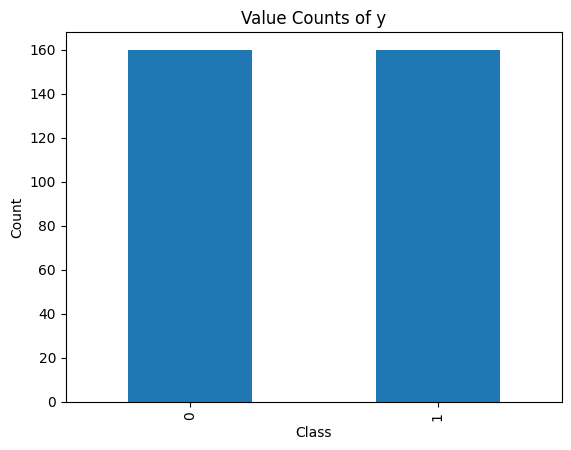

In [35]:
# Plot the classes
plt.figure()
y_train.value_counts().plot(kind='bar')
plt.title('Value Counts of y')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Model Creation

Create baseline model prediction

In [36]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.5


# 1. Random Forest Classifer

In [37]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=2)

In [38]:
print('Training score: ', round(model_rf.score(X_train, y_train),3))
print('Validation score: ', round(model_rf.score(X_val, y_val),3))

Training score:  1.0
Validation score:  1.0


In [39]:
model_rf_y_pred = model_rf.predict(X_test)
print(model_rf_y_pred)

[1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1]


# 2. Logistic Regression

In [40]:
model_LG = LogisticRegression( max_iter=200)
model_LG.fit(X_train, y_train)
model_LG_y_pred = model_LG.predict(X_test)
accuracy_score(model_LG_y_pred,y_test)

1.0

In [41]:
print('Training score: ', round(model_LG.score(X_train, y_train),3))
print('Validation score: ', round(model_LG.score(X_val, y_val),3))

Training score:  1.0
Validation score:  1.0


#### Communication

For Random Forest Classifier

Text(0.5, 1.0, 'Confusion Matrix for Test Data of RF Model')

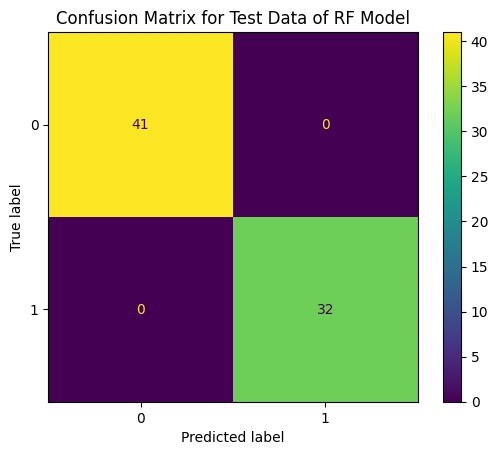

In [42]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(model_rf_y_pred, y_test), display_labels = [0, 1])
cm_display.plot()
plt.grid(False)
plt.title("Confusion Matrix for Test Data of RF Model")

For Logistic Regression

Text(0.5, 1.0, 'Confusion Matrix for Test Data of Logistic Regression')

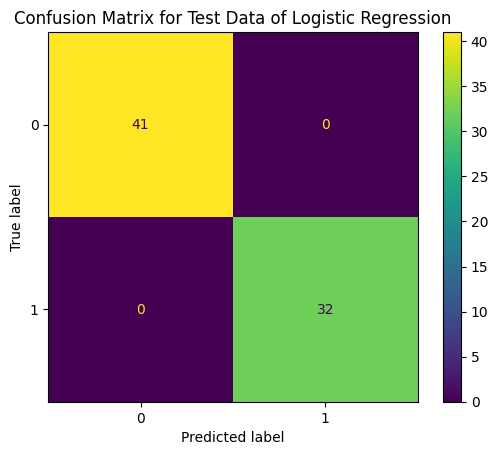

In [43]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(model_LG_y_pred, y_test), display_labels = [0, 1])
cm_display.plot()
plt.grid(False)
plt.title("Confusion Matrix for Test Data of Logistic Regression")

# Result

Passengers can be classified as having survived or not using the **"SEX"** feature. As a consequence, the model's accuracy is determined to be 100%.